# Special histograms in physt

Sometimes, it is necessary to bin values in transformed coordinates (e.g. *polar*). In principle,
it is possible to create histograms from already transformed values (i.e. *r* and *φ*). However,
this is not always the best way to go as each set of coordinates has its own peculiarities (e.g.
*the typical range of values for azimuthal angle*)

Physt provides a general framework for constructing the **transformed histograms** (see a dedicated 
section of this document) and a couple of most frequently used variants:

* **PolarHistogram**
* **SphericalHistogram**
* **CylindricalHistogram**

In [1]:
# Necessary import evil
%matplotlib inline
# 
from physt import histogram, binnings, special
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Generate some points in the Cartesian coordinates
np.random.seed(42)

x = np.random.rand(1000)  
y = np.random.rand(1000)
z = np.random.rand(1000)

## Polar histogram

This histograms maps values to **radius** (r) and **azimuthal angle** (φ, ranging from 0 to 2π).

By default (unless you specify the `phi_bins` parameter), the whole azimuthal range is spanned (even if there are no values that fall in parts of the circle).

PolarHistogram(bins=(10, 16), total=1000, dtype=int64)

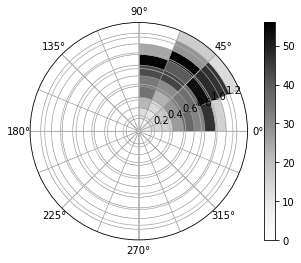

In [3]:
# Create a polar histogram with default parameters
hist = special.polar_histogram(x, y)
ax = hist.plot.polar_map()
hist

In [4]:
hist.bins

[array([[ 0.02704268,  0.16306851],
        [ 0.16306851,  0.29909433],
        [ 0.29909433,  0.43512015],
        [ 0.43512015,  0.57114597],
        [ 0.57114597,  0.7071718 ],
        [ 0.7071718 ,  0.84319762],
        [ 0.84319762,  0.97922344],
        [ 0.97922344,  1.11524926],
        [ 1.11524926,  1.25127509],
        [ 1.25127509,  1.38730091]]), array([[ 0.        ,  0.39269908],
        [ 0.39269908,  0.78539816],
        [ 0.78539816,  1.17809725],
        [ 1.17809725,  1.57079633],
        [ 1.57079633,  1.96349541],
        [ 1.96349541,  2.35619449],
        [ 2.35619449,  2.74889357],
        [ 2.74889357,  3.14159265],
        [ 3.14159265,  3.53429174],
        [ 3.53429174,  3.92699082],
        [ 3.92699082,  4.3196899 ],
        [ 4.3196899 ,  4.71238898],
        [ 4.71238898,  5.10508806],
        [ 5.10508806,  5.49778714],
        [ 5.49778714,  5.89048623],
        [ 5.89048623,  6.28318531]])]

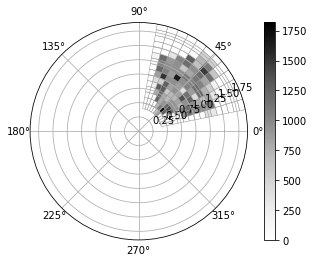

In [5]:
# Create a polar histogram with different binning
hist2 = special.polar_histogram(x+.3, y+.3, radial_bins="human", phi_bins="human")
ax = hist2.plot.polar_map(density=True)

In [6]:
# Default axes names
hist.axis_names

('r', 'phi')

When working with *any* transformed histograms, you can fill values in the **original**, or **transformed**
coordinates. All methods working with coordinates understand the parameter `transformed` which (if True)
says that the method parameter are already in the transformed coordinated; otherwise, all values are considered to be in the original coordinates and transformed on inserting (creating, searching).

In [7]:
# Using transformed / untransformed values
print("Non-transformed", hist.find_bin((0.1, 1)))
print("Transformed", hist.find_bin((0.1, 1), transformed=True))

print("Non-transformed", hist.find_bin((0.1, 2.7)))     # Value
print("Transformed", hist.find_bin((0.1, 2.7), transformed=True))

Non-transformed (7, 3)
Transformed (0, 2)
Non-transformed None
Transformed (0, 6)


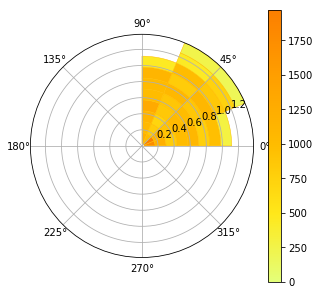

In [8]:
# Simple plotting, similar to Histogram2D
hist.plot.polar_map(density=True, show_zero=False, cmap="Wistia", lw=0.5, figsize=(5, 5));

### Adding new values

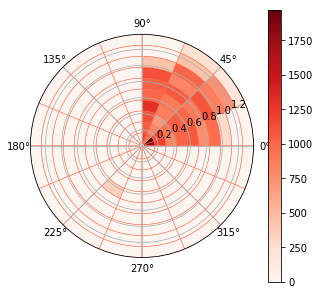

In [9]:
# Add a single, untransformed value
hist.fill((-.5, -.5), weight=12)
hist.plot.polar_map(density=True, show_zero=True, cmap="Reds", lw=0.5, figsize=(5, 5));

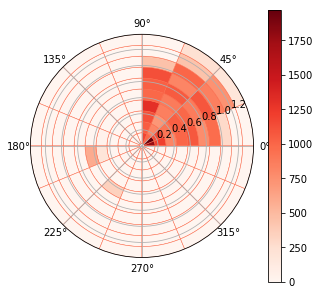

In [10]:
# Add a couple of values, transformed
data = [[.5, 3.05], [.5, 3.2], [.7, 3.3]]
weights = [1, 5, 20]

hist.fill_n(data, weights=weights, transformed=True)
hist.plot.polar_map(density=True, show_zero=True, cmap="Reds", lw=0.5, figsize=(5, 5));

### Projections

The projections are stored using specialized Histogram1D subclasses that keep (in the case of radial) information about the proper bin sizes.

RadialHistogram(bins=(10,), total=1038, dtype=int64)

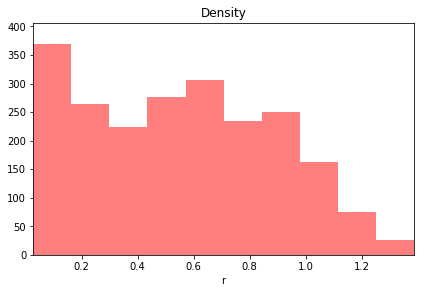

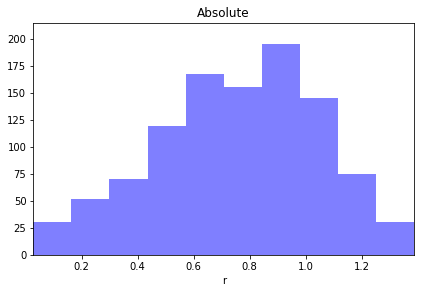

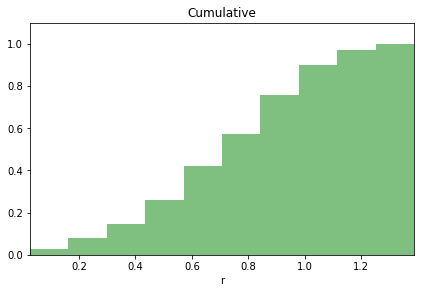

In [11]:
radial = hist.projection("r")
radial.plot(density=True, color="red", alpha=0.5).set_title("Density")
radial.plot(label="absolute", color="blue", alpha=0.5).set_title("Absolute")
radial.plot(label="cumulative", cumulative=True, density=True, color="green", alpha=0.5).set_title("Cumulative")
radial

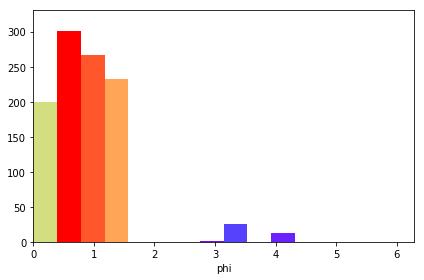

In [12]:
hist.projection("phi").plot(cmap="rainbow")

## Cylindrical histogram
To be implemented

In [13]:
data = np.random.rand(100, 3)
h = special.cylindrical_histogram(data)
h

CylindricalHistogram(bins=(10, 16, 10), total=100, dtype=int64)

PolarHistogram(bins=(10, 16), total=100, dtype=int64)

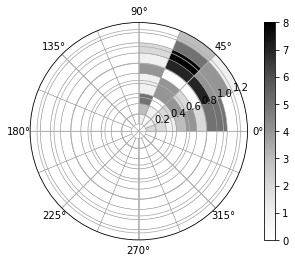

In [14]:
# %matplotlib qt
proj = h.projection("rho", "phi")
proj.plot.polar_map()
proj

CylinderSurfaceHistogram(bins=(16, 10), total=100, dtype=int64)

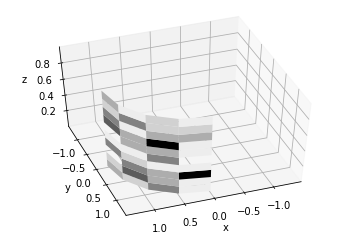

In [15]:
proj = h.projection("phi", "z")
ax = proj.plot.cylinder_map(show_zero=False)
ax.view_init(50, 70)
proj

## Spherical histogram
To be implemented

In [16]:
n = 1000000
data = np.empty((n, 3))
data[:,0] = np.random.normal(0, 1, n)
data[:,1] = np.random.normal(0, 1.3, n)
data[:,2] = np.random.normal(1, 1.2, n)
h = special.spherical_histogram(data)
h

SphericalHistogram(bins=(10, 16, 16), total=1000000, dtype=int64)

DirectionalHistogram(bins=(16, 16), total=1000000, dtype=int64)

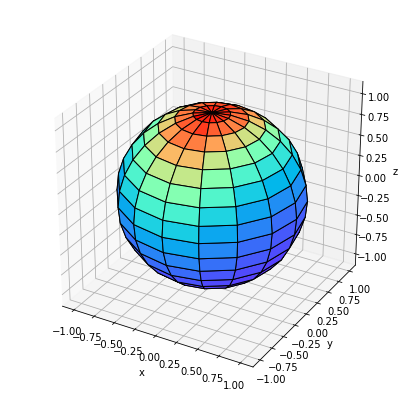

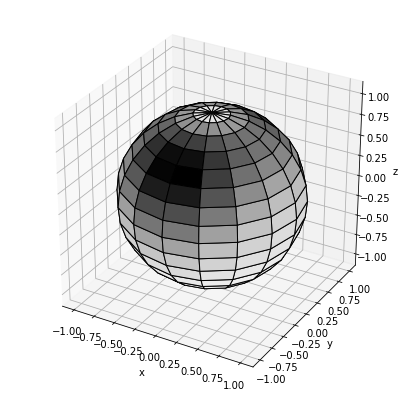

In [17]:
globe = h.projection("theta", "phi")
# globe.plot()
globe.plot.globe_map(density=True, figsize=(7, 7), cmap="rainbow") 
globe.plot.globe_map(density=False, figsize=(7, 7))
globe

## Implementing custom transformed histogram

**TO BE WRITTEN**